In [1]:
import numpy as np
from sklearn.neighbors import KDTree
import map_elites.cvt as cvt_map_elites
import map_elites.common as cm_map_elites
import cairo
from PIL import Image
import matplotlib.pyplot as plt 

In [2]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points

def make_hashable(array):
    return tuple(map(float, array))

def getKDT(n_niches, dim_map, number):

    fname = "centroids_{}.dat".format(number)
    c = np.loadtxt(fname)
    kdt = KDTree(c, leaf_size=30, metric='euclidean')
    return kdt

def draw(geno):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 10, 10)
    ctx = cairo.Context(surface)
    ctx.set_source_rgba(geno[0], geno[1], geno[2], 1)
    ctx.paint()
    return surface 
        
        

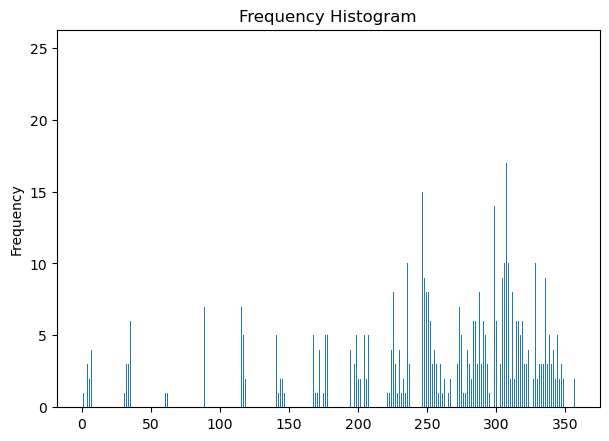

In [3]:
if __name__ == "__main__":
    
    hues = []
    for k in range(1,2):
        
        centroids = load_centroids("centroids_{}.dat".format(k))
        data = np.loadtxt("archive_{}.dat".format(k))
        fit = data[:,0:1]
        cent = data[:, 1:3]
        desc = data[:, 3: 5]
        geno = data[:, 5: 9]   
        
        for i in range(0,len(fit)):
            img = draw(geno[i])
            imgP = Image.frombuffer("RGBA",(img.get_width(),img.get_height() ),img.get_data(),"raw","RGBA",0,1)
            img_HSV = imgP.convert('HSV')
            img_HSV_arr = np.array(img_HSV)
            hue = np.mean(img_HSV_arr[:,:,0])*360 / 255

            hues.append(hue)
            
    #print(hues)
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

    # Plot Histogram on x
    x = hues
    plt.hist(x, bins=1000)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [5]:
if __name__ == "__main__":

    similarity = []
    for k in range(1,2):
        
        centroids = load_centroids("centroids_{}.dat".format(k))
        data = np.loadtxt("archive_{}.dat".format(k))
        fit = data[:,0:1]
        cent = data[:, 1:3]
        desc = data[:, 3: 5]
        geno = data[:, 5: 9]
        #print("Fit: {}".format(fit[0]))
        #print("Cent: {}".format(cent[0]))
        #print("Behavior: {}".format(desc[0]))
        #print("Geno: {}".format(geno[0]))

        test1 = np.array([0, 0, 0])
        test2 = np.array([1, 1, 1])
        max_pos = np.linalg.norm(test1- test2)
        #print("Maximum possible distance: {}".format(max_pos))

        pair_dist = []
        for i in range(0, len(fit)):
            for j in range(0, len(fit)):
                dist = np.linalg.norm(geno[i] - geno[j])
                pair_dist.append(dist / max_pos)
        similarity.append(sum(pair_dist) / len(pair_dist))
        
    print(sum(similarity)/len(similarity))

0.3340256777345454
